<a href="https://colab.research.google.com/github/anwarbabukm/DeepLearning/blob/main/CNN_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
X_train.max()

255

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

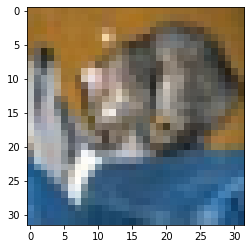

In [ ]:
plt.imshow(X_test[0])

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# ***Build CNN Model***

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [32, 32, 3]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))




model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# ***Compile and train the model***

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [12]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 185s 37ms/step - loss: 1.3930 - sparse_categorical_accuracy: 0.5016 - val_loss: 1.2053 - val_sparse_categorical_accuracy: 0.5672
Epoch 2/10
5000/5000 [==============================] - 184s 37ms/step - loss: 1.0726 - sparse_categorical_accuracy: 0.6207 - val_loss: 0.9903 - val_sparse_categorical_accuracy: 0.6458
Epoch 3/10
5000/5000 [==============================] - 192s 38ms/step - loss: 0.9511 - sparse_categorical_accuracy: 0.6637 - val_loss: 0.9556 - val_sparse_categorical_accuracy: 0.6638
Epoch 4/10
5000/5000 [==============================] - 189s 38ms/step - loss: 0.8690 - sparse_categorical_accuracy: 0.6933 - val_loss: 0.9204 - val_sparse_categorical_accuracy: 0.6742
Epoch 5/10
5000/5000 [==============================] - 191s 38ms/step - loss: 0.8098 - sparse_categorical_accuracy: 0.7135 - val_loss: 0.9282 - val_sparse_categorical_accuracy: 0.6753
Epoch 6/10
5000/5000 [==============================] - 192s 38ms/step - lo

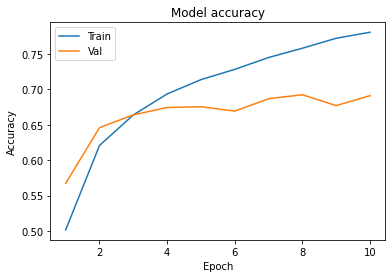

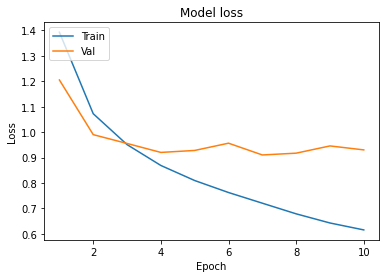

313/313 - 7s - loss: 0.9303 - sparse_categorical_accuracy: 0.6909


In [13]:
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [14]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [15]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [16]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f91dea668d0>)

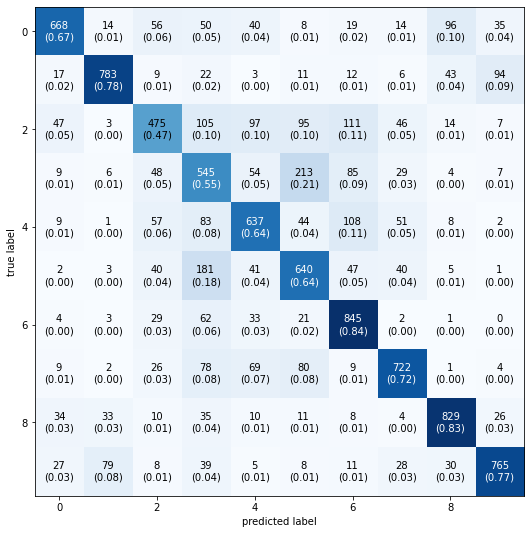

In [20]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mat,figsize=(9,9), show_normed=True)